<a href="https://colab.research.google.com/github/MinjaeHwangMo/MedCarePJ_E00184/blob/main/Copia_de_MedCare_Group3_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Load Data Set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
medcenter = pd.read_csv('medcenter.csv')
medcenter.head()

,Walking Difficulty,Torsades de Pointes,Skin Cancer,Hours of sleep,How do you Feel,Asthma Status,Do you Exercise,Gender,Kidney Disease,Is Smoking,Ethnicity,Diabetes,How many Drinks per Week,Age Group,Mental Health,Body Mass Index,Physical Health,History of Stroke,Patient ID
0,Y,Y,N,10.0,Good,N,Y,F,N,Y,White,N,N,80 or older,0.0,15.55,7.0,Y,100074
1,N,Y,N,7.0,Fair,Y,N,F,N,N,White,Y,N,65-69,0.0,38.62,2.0,N,100086
2,N,Y,N,7.0,Good,N,N,M,N,N,White,N,N,60-64,0.0,21.62,3.0,N,100094
3,Y,Y,N,8.0,Good,N,N,F,N,Y,White,N,N,65-69,0.0,22.14,0.0,N,100154
4,Y,Y,N,8.0,Fair,N,Y,M,Y,N,White,Y,N,70-74,0.0,43.05,0.0,N,100158


In [ ]:
medcenter.shape

(261311, 19)

# Check for Missing values

In [ ]:
missing_values = medcenter.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Walking Difficulty          0
Torsades de Pointes         0
Skin Cancer                 0
Hours of sleep              0
How do you Feel             0
Asthma Status               0
Do you Exercise             0
Gender                      0
Kidney Disease              0
Is Smoking                  0
Ethnicity                   0
Diabetes                    0
How many Drinks per Week    0
Age Group                   0
Mental Health               0
Body Mass Index             0
Physical Health             0
History of Stroke           0
Patient ID                  0
dtype: int64


# Drop Unnecessary Column

In [ ]:
column_to_drop = "Patient ID"

# Drop the specified column
medcenter.drop(column_to_drop, axis=1, inplace=True)

In [ ]:
# Display the modified DataFrame
medcenter.head()
medcenter.shape

(261311, 18)

# Convert Categorical variables to Numerical variables

## Binary Encoding
In this case, binary coding is possible because each of the variables has two categories of 1 or 0, and in the case of the variable "Gender" there is also a binary representation because only Male or Female sex is taken into account.

In [ ]:
medcenter['Walking Difficulty'] = np.where(medcenter['Walking Difficulty']=='Y',1,0)
medcenter['Torsades de Pointes'] = np.where(medcenter['Torsades de Pointes']=='Y',1,0)
medcenter['Skin Cancer'] = np.where(medcenter['Skin Cancer']=='Y',1,0)
medcenter['Asthma Status'] = np.where(medcenter['Asthma Status']=='Y',1,0)
medcenter['Do you Exercise'] = np.where(medcenter['Do you Exercise']=='Y',1,0)
medcenter['Gender'] = np.where(medcenter['Gender']=='F',1,0)
medcenter['Kidney Disease'] = np.where(medcenter['Kidney Disease']=='Y',1,0)
medcenter['Is Smoking'] = np.where(medcenter['Is Smoking']=='Y',1,0)
medcenter['Diabetes'] = np.where(medcenter['Diabetes']=='Y',1,0)
medcenter['How many Drinks per Week'] = np.where(medcenter['How many Drinks per Week']=='Y',1,0)
medcenter['History of Stroke'] = np.where(medcenter['History of Stroke']=='Y',1,0)

## Integer Encoding
In this case, integer coding is possible because we have a hierarchy between the categories in each variable.

In [ ]:
#With the help of the following functions we can explore what are all the categories
#the variable 'How do you Feel' has, so that we can make an error-free conversion
medcenter['How do you Feel'].unique()
medcenter['How do you Feel'].value_counts()

Very good    92342
Good         76252
Excellent    53714
Fair         29160
Poor          9843
Name: How do you Feel, dtype: int64

In [ ]:
dataMappingH={
    'Very good': 4,
    'Good': 3,
    'Excellent': 2,
    'Fair': 1,
    'Poor': 0
}
medcenter['How do you Feel']=medcenter['How do you Feel'].map(dataMappingH)

In [ ]:
#With the help of the following functions we can explore what are all the categories
#the variable 'Age Group' has, so that we can make an error-free conversion
medcenter['Age Group'].unique()
medcenter['Age Group'].value_counts()

65-69          28202
60-64          27728
70-74          25852
55-59          24354
50-54          20442
80 or older    20375
75-79          18028
45-49          17553
40-44          16874
18-24          16865
35-39          16527
30-34          14944
25-29          13567
Name: Age Group, dtype: int64

In [ ]:
dataMappingA={
'80 or older': 12,
'75-79': 11,
'70-74': 10,
'65-69': 9,
'60-64': 8,
'55-59': 7,
'50-54': 6,
'45-49': 5,
'40-44': 4,
'35-39': 3,
'30-34': 2,
'25-29': 1,
'18-24': 0
}
medcenter['Age Group']=medcenter['Age Group'].map(dataMappingA)

## One-Hot Encoding
Since the variable 'Ethnicity' does not have a hierarchy among its categories, it cannot be represented in binary form, and it must be converted to a numerical variable in order to be used in the data visualisation part. We use one-hot encoding.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

medcenter = pd.get_dummies(medcenter, columns=["Ethnicity"])

In [ ]:
#For making sure all of the convertions from categorical to numerical variables have been done correctly:
display(medcenter)

,Walking Difficulty,Torsades de Pointes,Skin Cancer,Hours of sleep,How do you Feel,Asthma Status,Do you Exercise,Gender,Kidney Disease,Is Smoking,...,Mental Health,Body Mass Index,Physical Health,History of Stroke,Ethnicity_American Indian/Alaskan Native,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Other,Ethnicity_White
0,1,1,0,10.0,3,0,1,1,0,1,...,0.0,15.55,7.0,1,0,0,0,0,0,1
1,0,1,0,7.0,1,1,0,1,0,0,...,0.0,38.62,2.0,0,0,0,0,0,0,1
2,0,1,0,7.0,3,0,0,0,0,0,...,0.0,21.62,3.0,0,0,0,0,0,0,1
3,1,1,0,8.0,3,0,0,1,0,1,...,0.0,22.14,0.0,0,0,0,0,0,0,1
4,1,1,0,8.0,1,0,1,0,1,0,...,0.0,43.05,0.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261306,0,0,0,6.0,3,0,1,1,0,1,...,15.0,46.03,0.0,0,0,0,0,0,0,1
261307,0,0,0,7.0,4,0,1,1,0,1,...,0.0,25.61,0.0,0,0,0,0,0,0,1
261308,0,0,0,7.0,3,0,0,0,0,1,...,0.0,35.62,30.0,0,0,0,0,0,1,0
261309,0,0,0,8.0,4,0,1,1,0,1,...,0.0,28.34,0.0,0,0,0,0,0,0,1


# Data Visualization
**Histogram:** visualize the distribution of the continuous variables 'Hours of Sleep', 'How many Drinks per Week', and 'Body Mass Index (BMI)'.

**Bar Chart:** for the categorical variables 'Do you Exercise', 'Is Smoking', and health conditions to understand the frequency of each category.

**Boxplot:** to compare the distribution of 'Hours of Sleep', 'Drinks per Week', and 'BMI' across the different categories of 'How do you Feel'.

**Bar chart:** to show the proportion of individuals who exercise, smoke, or have various health conditions within each self-reported health category

## Heatmap

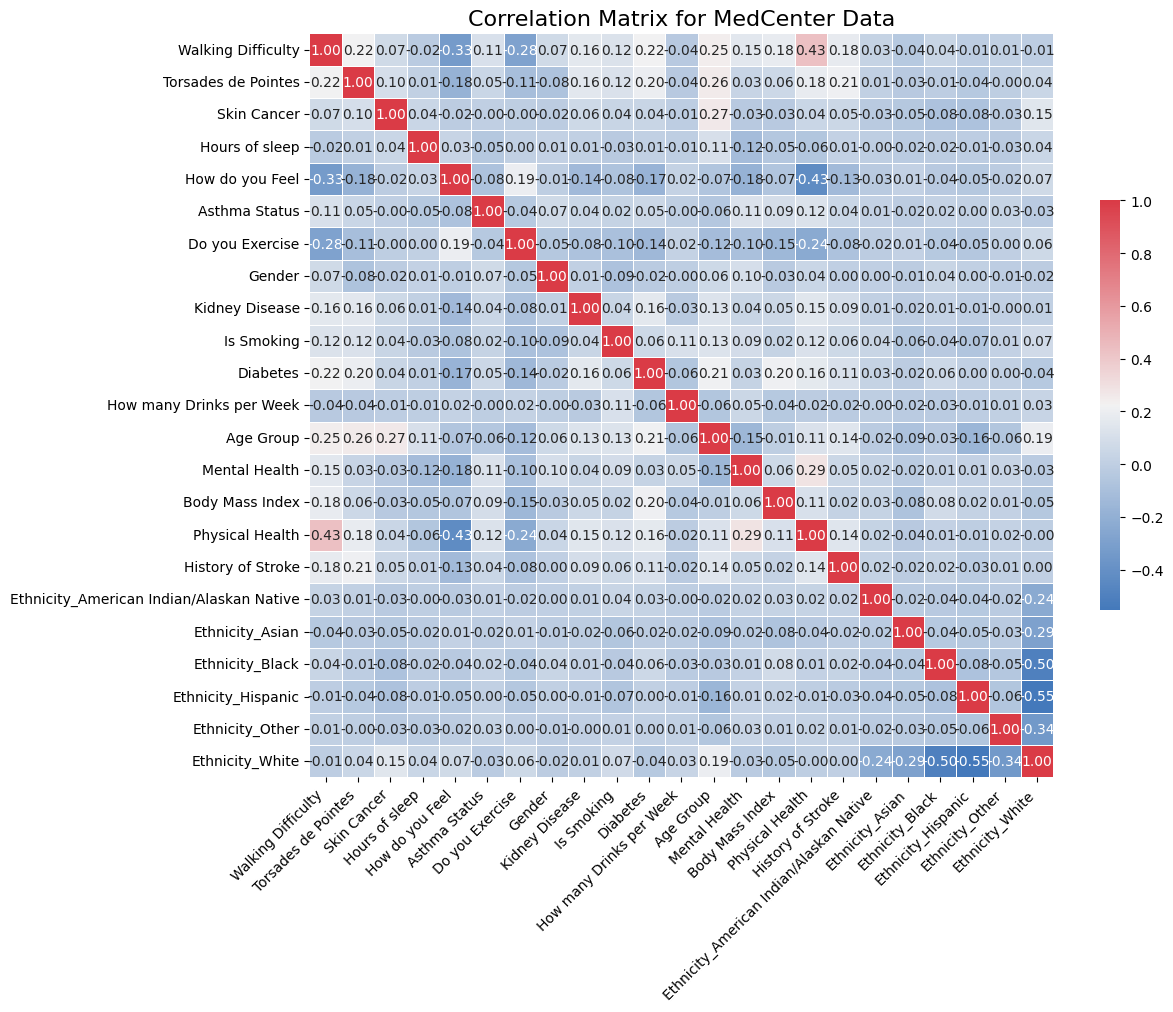

In [ ]:
# Calculate the correlation matrix
corr_matrix = medcenter.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the size as needed
cmap = sns.diverging_palette(250, 10, as_cmap=True)  # A diverging color palette
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Set the title for the heatmap
ax.set_title('Correlation Matrix for MedCenter Data')

# Rotate the x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Optimize space so labels and titles are clear
plt.subplots_adjust(top=0.93)
ax.title.set_size(16)  # Set the title size as needed

# Show the figure with the heatmap
plt.show()

## Histogram_Continuous Variables

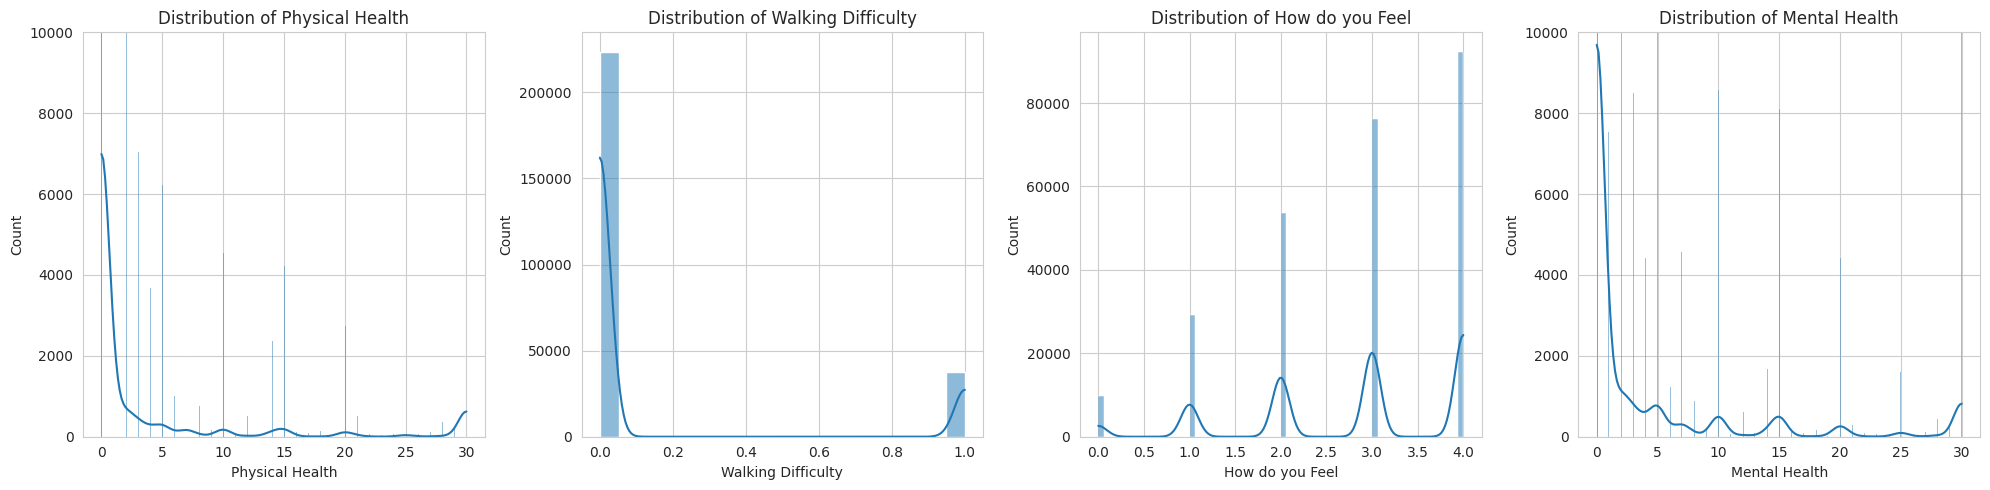

In [ ]:
# Drop rows with missing values in the columns of interest
medcenter_clean = medcenter.dropna(subset=['Physical Health', 'Walking Difficulty', 'How do you Feel', 'Mental Health'])

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure to hold multiple subplots
plt.figure(figsize=(20, 5))

# Histogram for 'Physical Health'
plt.subplot(1, 4, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(data=medcenter_clean, x='Physical Health', kde=True)
plt.title('Distribution of Physical Health')
plt.ylim(0, 10000)  # Set Y-axis limit

# Histogram for 'Walking Difficulty'
plt.subplot(1, 4, 2)  # 1 row, 3 columns, 1st subplot
sns.histplot(data=medcenter_clean, x='Walking Difficulty', kde=True)
plt.title('Distribution of Walking Difficulty')


# Histogram for 'How do you Feel'
plt.subplot(1, 4, 3)  # 1 row, 3 columns, 2nd subplot
sns.histplot(data=medcenter_clean, x='How do you Feel', kde=True)
plt.title('Distribution of How do you Feel')


# Histogram for 'Mental Health'
plt.subplot(1, 4, 4)  # 1 row, 3 columns, 3rd subplot
sns.histplot(data=medcenter_clean, x='Mental Health', kde=True)
plt.title('Distribution of Mental Health')
plt.ylim(0, 10000)  # Set Y-axis limit

# Display the plots
plt.tight_layout()
plt.show()

## Bar Chart for Binary Variables
ss

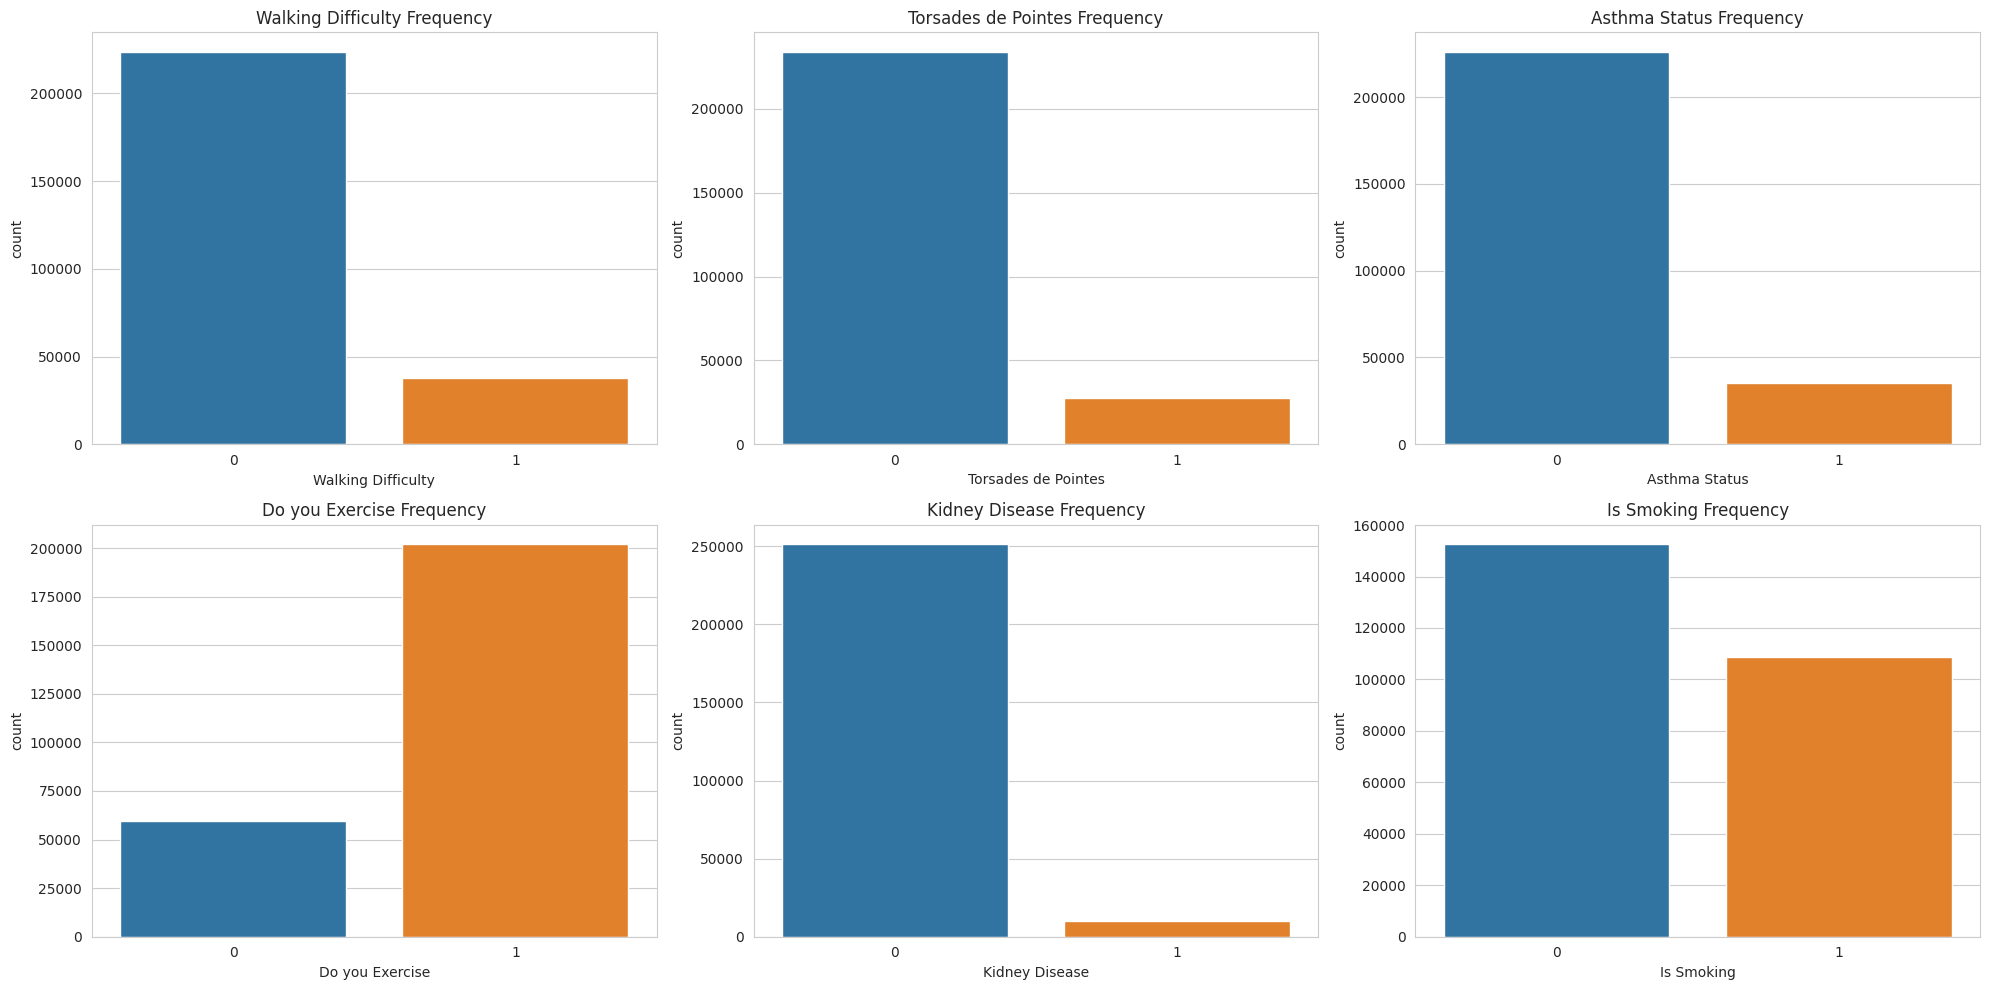

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure to hold multiple subplots
plt.figure(figsize=(20, 10))

# Bar chart for 'Walking Difficulty'
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, 1st subplot
sns.countplot(x='Walking Difficulty', data=medcenter)
plt.title('Walking Difficulty Frequency')

# Bar chart for 'Torsades de Pointes'
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, 2nd subplot
sns.countplot(x='Torsades de Pointes', data=medcenter)
plt.title('Torsades de Pointes Frequency')

# Bar chart for 'Asthma Status '
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, 3rd subplot
sns.countplot(x='Asthma Status', data=medcenter)
plt.title('Asthma Status Frequency')

# Bar chart for 'Do you Exercise'
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, 4th subplot
sns.countplot(x='Do you Exercise', data=medcenter)
plt.title('Do you Exercise Frequency')

# Bar chart for 'Kidney Disease'
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, 5th subplot
sns.countplot(x='Kidney Disease', data=medcenter)
plt.title('Kidney Disease Frequency')

# Bar chart for 'Is Smoking'
plt.subplot(2, 3, 6)  # 2 rows, 3 columns, 6th subplot
sns.countplot(x='Is Smoking', data=medcenter)
plt.title('Is Smoking Frequency')

# Adjust layout for readability
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age Group Frequency')

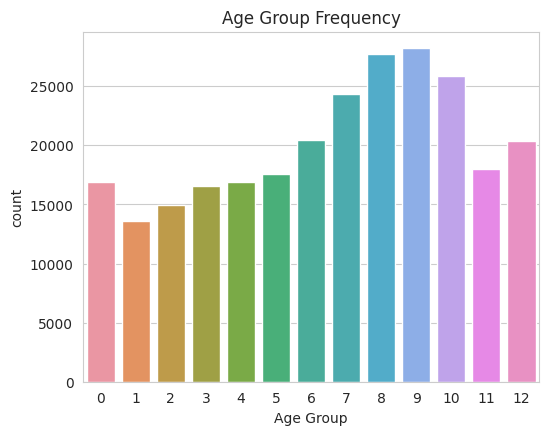

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure to hold multiple subplots
plt.figure(figsize=(20, 10))

# Bar chart for 'Age Group'
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, 1st subplot
sns.countplot(x='Age Group', data=medcenter)
plt.title('Age Group Frequency')

## Count Plot_Frequency of Drinking Status by Feelings

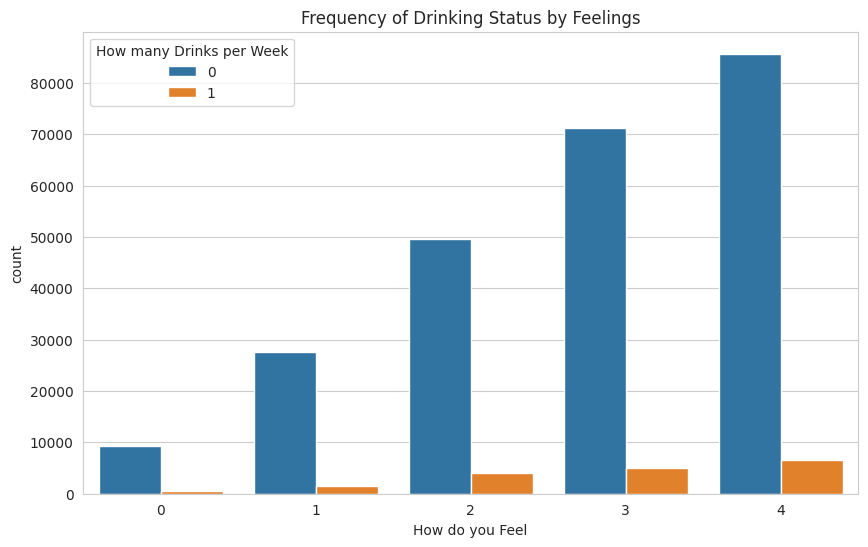

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='How do you Feel', hue='How many Drinks per Week', data=medcenter)
plt.title('Frequency of Drinking Status by Feelings')
plt.show()

## Box Plot

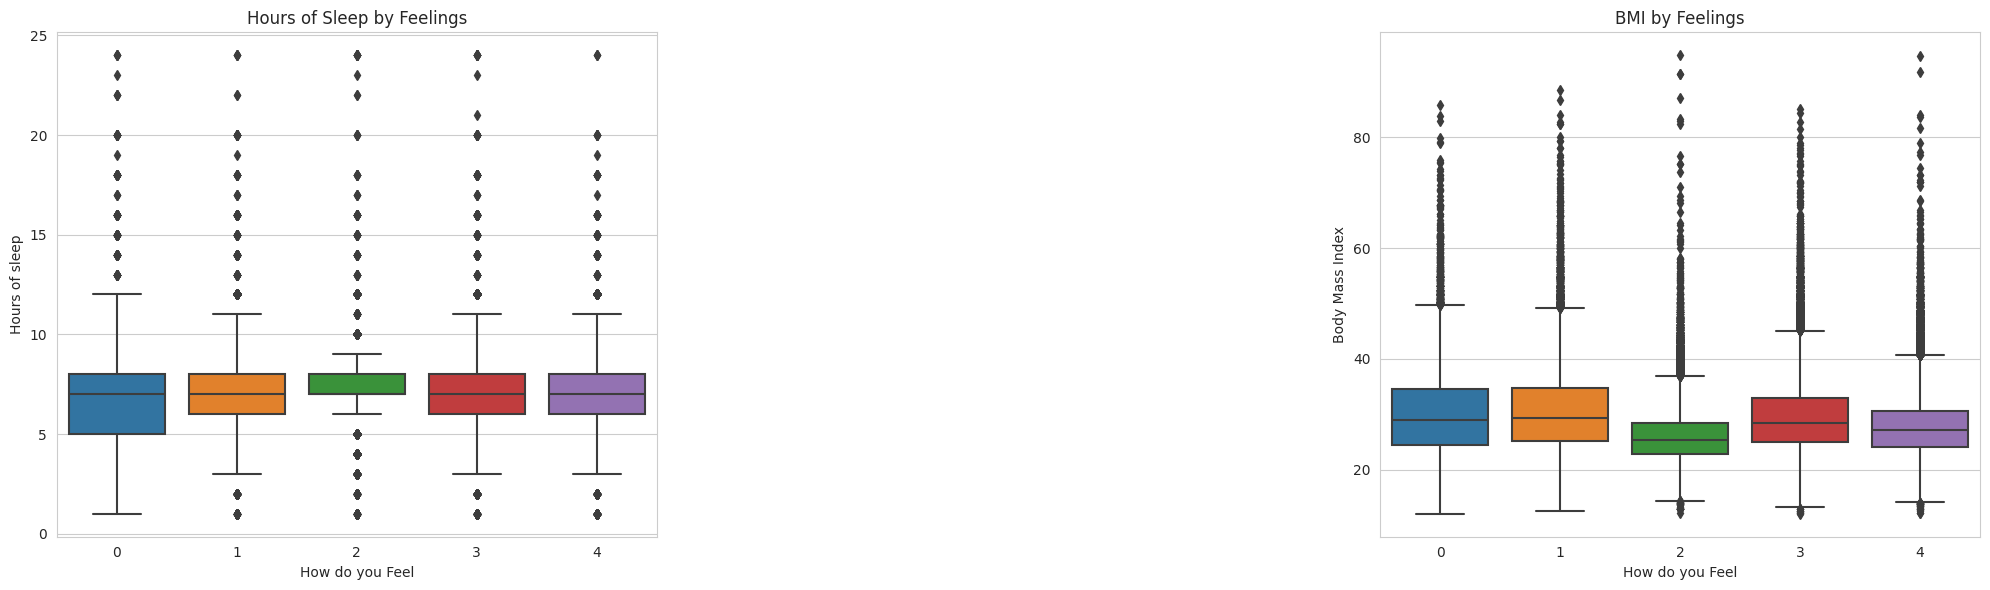

In [ ]:
# Strip leading/trailing whitespace from column names
medcenter.columns = medcenter.columns.str.strip()

# Now let's try creating the boxplots again

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure to hold multiple subplots
plt.figure(figsize=(20, 6))

# Boxplot for 'Hours of sleep' across 'How do you Feel'
plt.subplot(1, 3, 1)
sns.boxplot(x='How do you Feel', y='Hours of sleep', data=medcenter)
plt.title('Hours of Sleep by Feelings')


# Boxplot for 'Body Mass Index' across 'How do you Feel'
plt.subplot(1, 3, 3)
sns.boxplot(x='How do you Feel', y='Body Mass Index', data=medcenter)
plt.title('BMI by Feelings')

# Display the plots
plt.tight_layout()
plt.show()

## Normalize the count within each 'How do you Feel' category

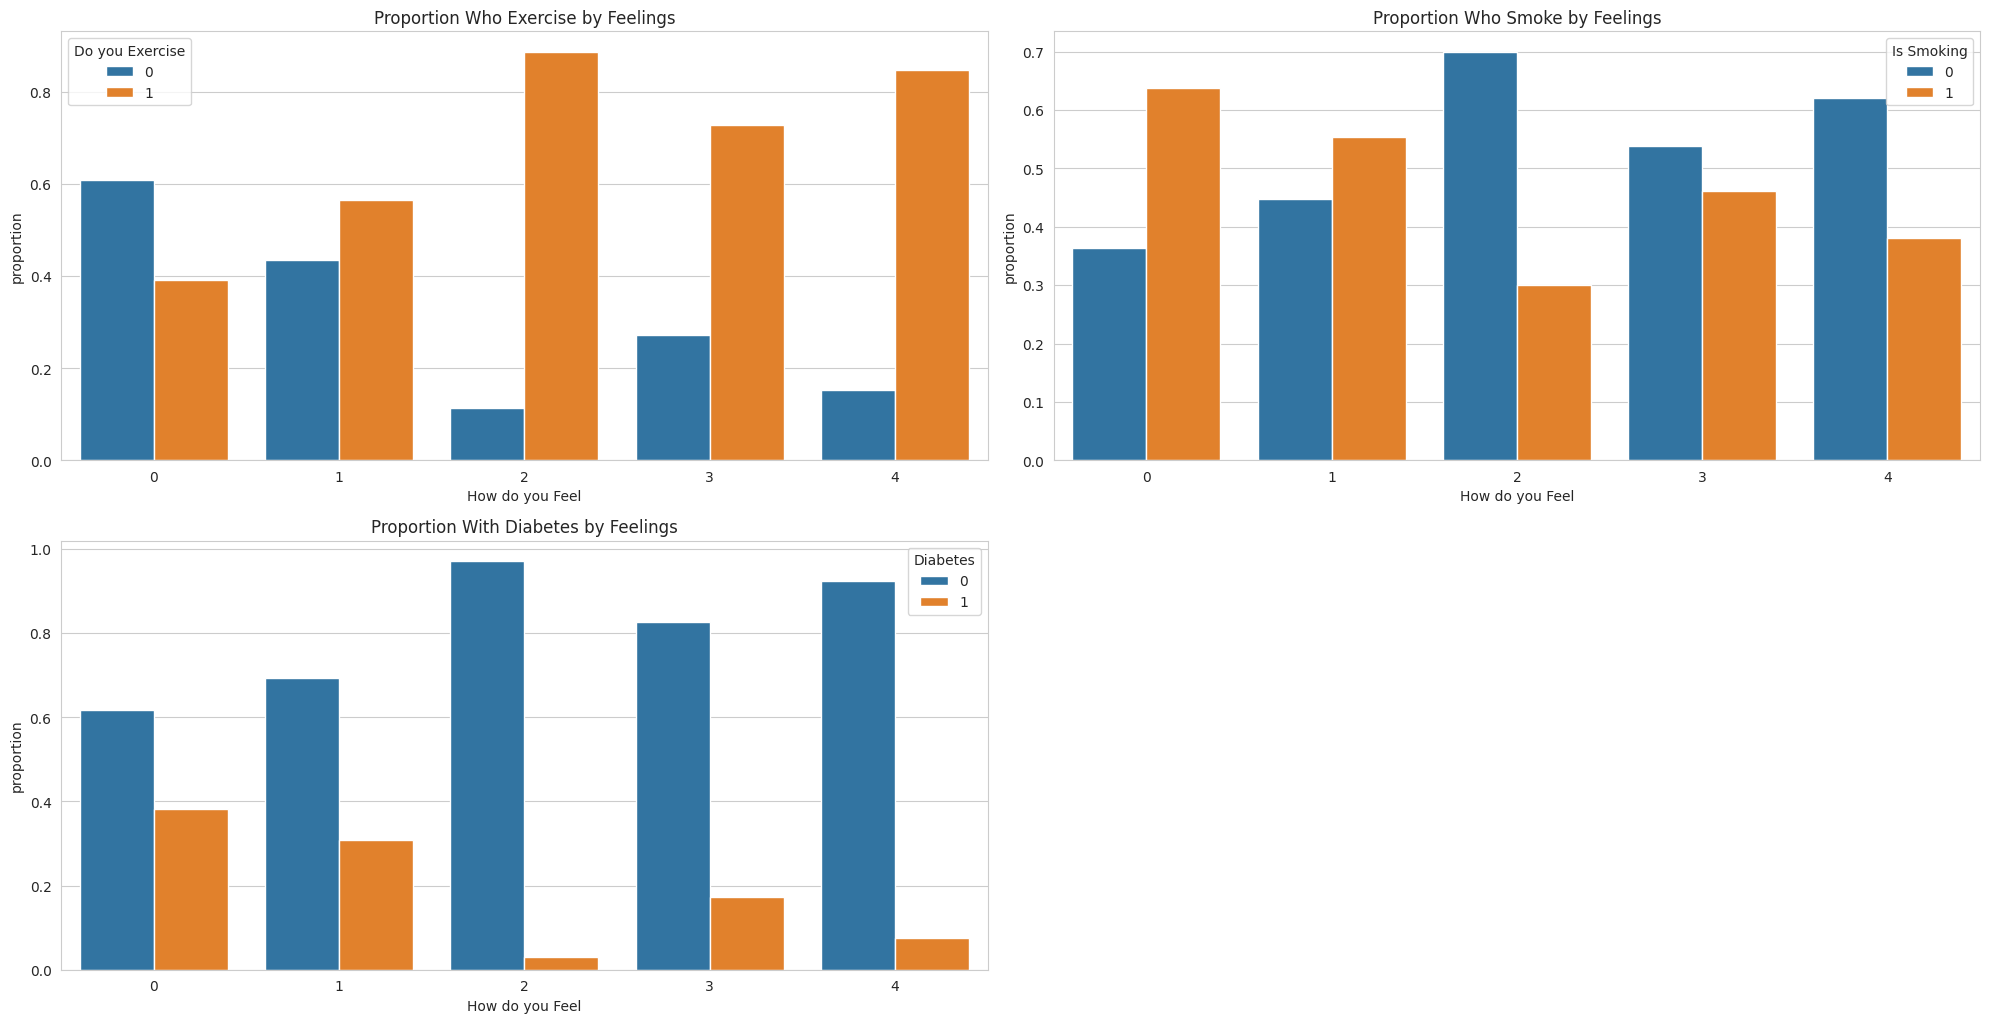

In [ ]:
# Normalize the count for 'Do you Exercise' within each 'How do you Feel' category
plt.figure(figsize=(20, 15))

# Calculate the proportion for 'Do you Exercise'
exercise_proportion = medcenter.groupby('How do you Feel')['Do you Exercise'].value_counts(normalize=True).rename('proportion').reset_index()

# Bar chart for 'Do you Exercise'
plt.subplot(3, 2, 1)
sns.barplot(x='How do you Feel', y='proportion', hue='Do you Exercise', data=exercise_proportion)
plt.title('Proportion Who Exercise by Feelings')

# Repeat for 'Is Smoking'
smoking_proportion = medcenter.groupby('How do you Feel')['Is Smoking'].value_counts(normalize=True).rename('proportion').reset_index()
plt.subplot(3, 2, 2)
sns.barplot(x='How do you Feel', y='proportion', hue='Is Smoking', data=smoking_proportion)
plt.title('Proportion Who Smoke by Feelings')

# And for a health condition, e.g., 'Diabetes'
diabetes_proportion = medcenter.groupby('How do you Feel')['Diabetes'].value_counts(normalize=True).rename('proportion').reset_index()
plt.subplot(3, 2, 3)
sns.barplot(x='How do you Feel', y='proportion', hue='Diabetes', data=diabetes_proportion)
plt.title('Proportion With Diabetes by Feelings')

plt.tight_layout()
plt.show()

## Pair Plot_Continuous Variables

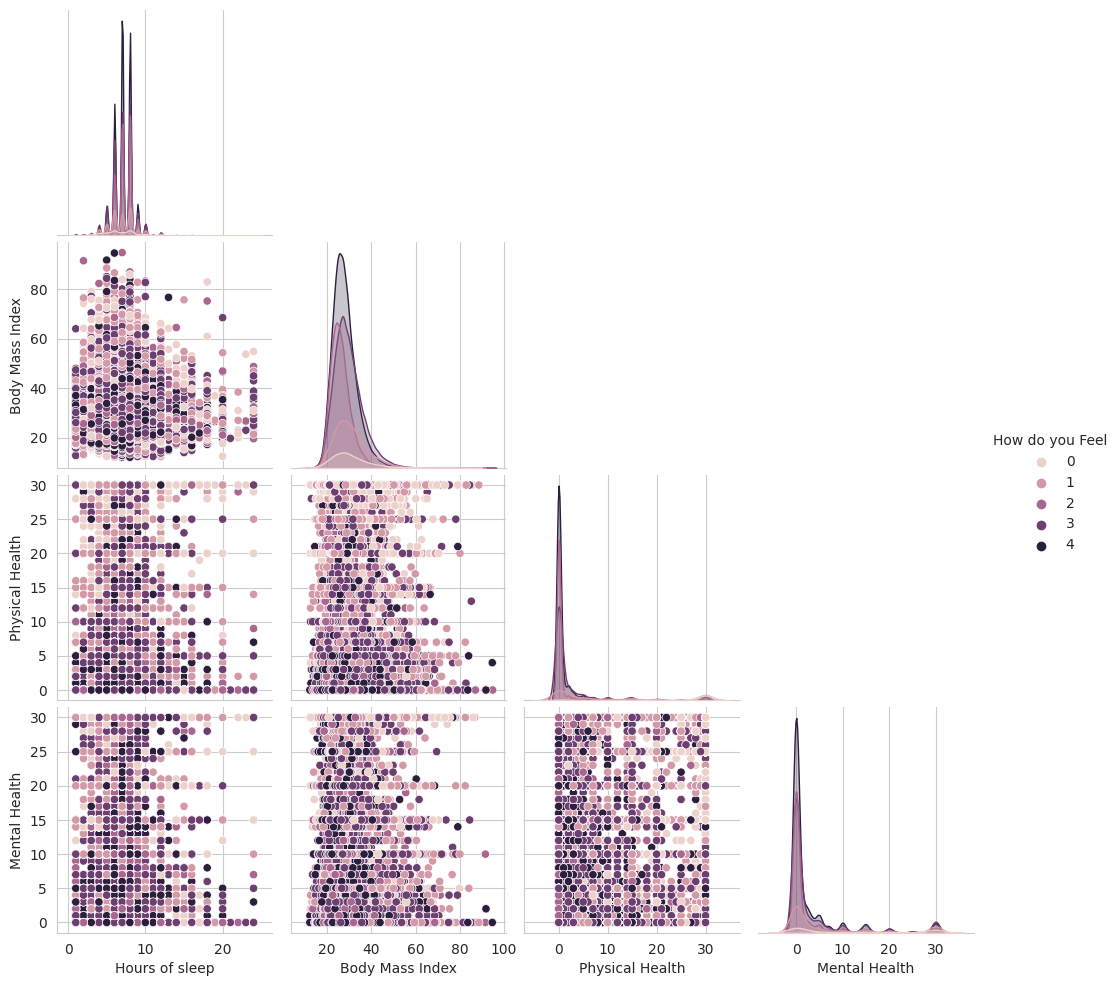

In [ ]:
# Create the pairplot with 'How do you Feel' as the hue
sns.pairplot(medcenter, vars=['Hours of sleep', 'Body Mass Index', 'Physical Health', 'Mental Health'],
             hue='How do you Feel', corner=True)

# Show the pairplot
plt.show()

# Drop Unnecessary Column based on EDA

In [ ]:
#column_to_drop = "Patient ID"

# Drop the specified column
#medcenter.drop(column_to_drop, axis=1, inplace=True)

columns_to_drop = ['Skin Cancer', 'Hours of sleep', 'Gender', 'How many Drinks per Week', 'Ethnicity_American Indian/Alaskan Native', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Hispanic', 'Ethnicity_White', 'Ethnicity_Other']

# Drop specified columns
medcenter.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
display(medcenter)

,Walking Difficulty,Torsades de Pointes,How do you Feel,Asthma Status,Do you Exercise,Kidney Disease,Is Smoking,Diabetes,Age Group,Mental Health,Body Mass Index,Physical Health,History of Stroke
0,1,1,3,0,1,0,1,0,12,0.0,15.55,7.0,1
1,0,1,1,1,0,0,0,1,9,0.0,38.62,2.0,0
2,0,1,3,0,0,0,0,0,8,0.0,21.62,3.0,0
3,1,1,3,0,0,0,1,0,9,0.0,22.14,0.0,0
4,1,1,1,0,1,1,0,1,10,0.0,43.05,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261306,0,0,3,0,1,0,1,0,7,15.0,46.03,0.0,0
261307,0,0,4,0,1,0,1,0,11,0.0,25.61,0.0,0
261308,0,0,3,0,0,0,1,0,12,0.0,35.62,30.0,0
261309,0,0,4,0,1,0,1,0,8,0.0,28.34,0.0,0


# Create Dependent & Independent Variable Vectors
The goal is to estimate an individual's “Physical Health” feature, for that we have to assign this variable as our desired output variable represented by 'y', and all the other variables will our inputs variables as 'x'.

In [ ]:
x = medcenter.drop('Physical Health', axis = 1)
y = medcenter['Physical Health']

# Normalising Variables
The standarization of the variable is key for making our variables comparable.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x)
x_test = scaler.fit_transform(x)

# Split Data into Train / Test set
This part is a fundamental step because the training set is used to train the model, while the test set is used to assess how well the model generalizes to new, unseen data.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 1)

# Testing on Models
As it was mentioned, our desired output is "Physical Health", from what we know by checking the data, this a numeric variable so we are facing a regression problem. For this purpose, the following regression algorithms are proposed:

## Multiple Linear Regresion

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

print("Predicted Values (y_pred): ", y_pred)

Predicted Values (y_pred):  [-1.20824877  0.64351077  2.15514566 ... -1.21354054  1.39036353
 -0.30992096]


### Performance Metrics
**R-squared:** Provides information on the degree to which the independent variable(s) explain(s) the variability of the dependent variable.

**Mean Squared Error (MSE):** Provides a quantitative measure of how well a regression model fits the observed data. A lower MSE indicates a better fit, with smaller errors between predicted and actual values.

**Root Mean Squared Error (RMSE):** Is similar to Mean Squared Error (MSE), but RMSE takes the square root of the average squared differences between predicted and actual values.

**Mean Absolute Error (MAE):** Measures the average absolute difference between the predicted values and the actual values. Has the advantage of being simple to understand and less influenced by outliers than metrics based on squared differences. However, it does not emphasize larger errors as much as MSE or RMSE

All of these metrics have some limitations, so it is best to use them in conjunction.

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.32572346143433806


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

In [ ]:
from sklearn.metrics import mean_squared_error
# Calculate Root Mean Squared Error (RMSE)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 6.62607473987857


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 4.186145825775644


## Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Training a RandomForest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

# Predicting on the test set
y_pred2 = rf.predict(x_test)

### Performance Metrics

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2_2 = r2_score(y_test, y_pred2)
print("R-squared:", r2_2)

R-squared: -0.04781318776886989


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse_2 = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error (MSE):", mse_2)

Mean Squared Error (MSE): 68.22734508939506


In [ ]:
from sklearn.metrics import mean_squared_error
# Calculate Root Mean Squared Error (RMSE)

rmse_2 = np.sqrt(mse_2)
print("Root Mean Squared Error (RMSE):", rmse_2)

Root Mean Squared Error (RMSE): 8.25998456956156


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae_2 = mean_absolute_error(y_test, y_pred2)
print("Mean Absolute Error (MAE):", mae_2)

## Ensemble Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define individual models
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf3 = LogisticRegression(random_state=42, max_iter=1000)

# Create pipelines for each model to include scaling (except for RandomForest)
pipeline1 = Pipeline([('scaler1', StandardScaler()), ('clf1', clf1)])
pipeline2 = Pipeline([('scaler2', StandardScaler()), ('clf2', clf2)])
pipeline3 = Pipeline([('scaler3', StandardScaler()), ('clf3', clf3)])

# Create an ensemble of models
ensemble_clf = VotingClassifier(estimators=[
    ('rf', pipeline1),
    ('gb', pipeline2),
    ('lr', pipeline3)], voting='soft')

# Train the ensemble model
ensemble_clf.fit(x_train, y_train)

# Predicting on the test set
y_pred3 = ensemble_clf.predict(x_test)

### Performance Metrics

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2_3 = r2_score(y_test, y_pred3)
print("R-squared:", r2_3)

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse_3 = mean_squared_error(y_test, y_pred3)
print("Mean Squared Error (MSE):", mse_3)

In [ ]:
from sklearn.metrics import mean_squared_error
# Calculate Root Mean Squared Error (RMSE)

rmse_3 = np.sqrt(mse_3)
print("Root Mean Squared Error (RMSE):", rmse_3)

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae_3 = mean_absolute_error(y_test, y_pred3)
print("Mean Absolute Error (MAE):", mae_3)

## Comparing Results

In [ ]:
Models = ['Multiple Linear Regresion', 'Random Forest', 'Ensemble Learning']
R_Squared = [0.33, 0.05, 0.11]
MSE = [43.82, 61.84, 57.97]
RMSE = [6.62, 7.86, 7.61]
MAE = [4.18, 3.09, 2.84]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# R-squared
axes[0, 0].bar(Models, R_Squared, color='blue', alpha=0.7)
axes[0, 0].set_title('R-squared')
axes[0, 0].set_ylim(0, 1)

# Mean Squared Error (MSE)
axes[0, 1].bar(Models, MSE, color='green', alpha=0.7)
axes[0, 1].set_title('Mean Squared Error (MSE)')

# Root Mean Squared Error (RMSE)
axes[1, 0].bar(Models, RMSE, color='orange', alpha=0.7)
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')

# Mean Absolute Error (MAE)
axes[1, 1].bar(Models, MAE, color='red', alpha=0.7)
axes[1, 1].set_title('Mean Absolute Error (MAE)')

plt.tight_layout()
plt.show()